In [1]:
library(MASS)
library("mclust")
library(ggplot2)
library(AdaptGauss)


Package 'mclust' version 5.4.7
Type 'citation("mclust")' for citing this R package in publications.

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang



# Muestra galaxias tempel

In [2]:
g<-read.table("../../tempel_Mr.dat",sep="")
#"id","al","del","z","mr","mg","rabs","gabs"

In [3]:
rma=subset(g$V7, g$V8 > -27. & g$V8 < -15.)
gma=subset(g$V8, g$V8 > -27. & g$V8 < -15.)

In [4]:
c = gma - rma
color <- subset(c, c > 0. & c < 1.1)
rr <- subset(rma, c > 0. & c < 1.1)
anyNA(color)

[1] FALSE

### Bines en Magnitud Absoluta

In [5]:
bin=seq(-22.5,-18.,0.3)
bin
length(bin)

[1] -22.5 -22.2 -21.9 -21.6 -21.3 -21.0 -20.7 -20.4 -20.1 -19.8 -19.5 -19.2
[13] -18.9 -18.6 -18.3 -18.0

[1] 16

#### Range Mabs r-band

In [6]:
color1= subset(color, rr>=bin[1] & rr< bin[2])
color2= subset(color, rr>=bin[2] & rr< bin[3])
color3= subset(color, rr>=bin[3] & rr< bin[4])
color4= subset(color, rr>=bin[4] & rr< bin[5])
color5= subset(color, rr>=bin[5] & rr< bin[6])
color6= subset(color, rr>=bin[6] & rr< bin[7])
color7= subset(color, rr>=bin[7] & rr< bin[8])
color8= subset(color, rr>=bin[8] & rr< bin[9])
color9= subset(color, rr>=bin[9] & rr< bin[10])
color10= subset(color, rr>=bin[10] & rr< bin[11])
color11= subset(color, rr>=bin[11] & rr< bin[12])
color12= subset(color, rr>=bin[12] & rr< bin[13])
color13= subset(color, rr>=bin[13] & rr< bin[14])
color14= subset(color, rr>=bin[14] & rr< bin[15])
color15= subset(color, rr>=bin[15] & rr< bin[16])

# GMM (2 Gaussians)

In [7]:
gmm <- densityMclust(color,G=2,initialization = set.seed(0),modelNames = "V") #"E"

In [8]:
#models univariate mixture
#"E"equal variance (one-dimensional)
#"V"variable/unqual variance (one-dimensional)

gmm$modelName

[1] "V"

In [9]:
gmm1 <- densityMclust(color1,G=2,initialization = set.seed(0))
gmm2 <- densityMclust(color2,G=2,initialization = set.seed(0))
gmm3 <- densityMclust(color3,G=2,initialization = set.seed(0))
gmm4 <- densityMclust(color4,G=2,initialization = set.seed(0))
gmm5 <- densityMclust(color5,G=2,initialization = set.seed(0))
gmm6 <- densityMclust(color6,G=2,initialization = set.seed(0))
gmm7 <- densityMclust(color7,G=2,initialization = set.seed(0))
gmm8 <- densityMclust(color8,G=2,initialization = set.seed(0))
gmm9 <- densityMclust(color9,G=2,initialization = set.seed(0))
gmm10 <- densityMclust(color10,G=2,initialization = set.seed(0))
gmm11 <- densityMclust(color11,G=2,initialization = set.seed(0))
gmm12 <- densityMclust(color12,G=2,initialization = set.seed(0))
gmm13 <- densityMclust(color13,G=2,initialization = set.seed(0))
gmm14 <- densityMclust(color14,G=2,initialization = set.seed(0))
gmm15 <- densityMclust(color15,G=2,initialization = set.seed(0))

In [10]:
summary(gmm, parameters = TRUE)

------------------------------------------------------- 
Density estimation via Gaussian finite mixture modeling 
------------------------------------------------------- 

Mclust V (univariate, unequal variance) model with 2 components: 

 log-likelihood      n df      BIC      ICL
       370084.8 553737  5 740103.4 588093.2

Mixing probabilities:
        1         2 
0.5457859 0.4542141 

Means:
        1         2 
0.5815899 0.7804485 

Variances:
          1           2 
0.019676729 0.001953032 

In [11]:
#gmm$classification #--> a que gassiana pertenece

# Plot

In [12]:
plot_col <- function(xx,gaus,a,bin1,bin2){
    
    br <- seq(min(xx), max(xx), length = 100)
    #plot(gaus, what = "density", data = xx, breaks = br,xlab="",xaxt='n',yaxt='n')
    plot(gaus, what = "density",  breaks = br,xlab="",lty=1)
    h=hist(xx,plot=FALSE)
    points(h$mids,h$density,type="s", col = "black")

    x <- seq(min(xx)-diff(range(xx))/10, max(xx)+diff(range(xx))/10, length = 200)
    cdens <- predict(gaus, x, what = "cdens")
    cdens <- t(apply(cdens, 1, function(d) d*gaus$parameters$pro))
    matplot(x, cdens, type = "l", lwd = 1, add = TRUE, lty = 2:2, col = c("red","blue"),xaxt='n',yaxt='n')

    m1=gaus$parameters$mean[1]; sd1=sqrt(gaus$parameters$variance$sigmasq[1]); p1=gaus$parameters$pro[1]
    m2=gaus$parameters$mean[2]; sd2=sqrt(gaus$parameters$variance$sigmasq[2]); p2=gaus$parameters$pro[2]

    #inteseccion de dos gaussianas
    intersec=Intersect2Mixtures(m1,sd1,p1,m2,sd2,p2)
    ll=intersec$CutX
    abline(v=ll,col='magenta')

    legend("topleft", legend=c(a), cex=0.7,bty="n")

    intersect=round(ll,digits=4)
    dd=data.frame(bin1,bin2,intersect)
                                
    xtick<-seq(0, 10, by=5)
    axis(side=1, at=c(0.,0.2,0.4,0.6,0.8,1.0,1.2), labels = FALSE)
                 
    return(dd)
}


In [13]:
#cairo_ps("color_tempel_gmm.eps")

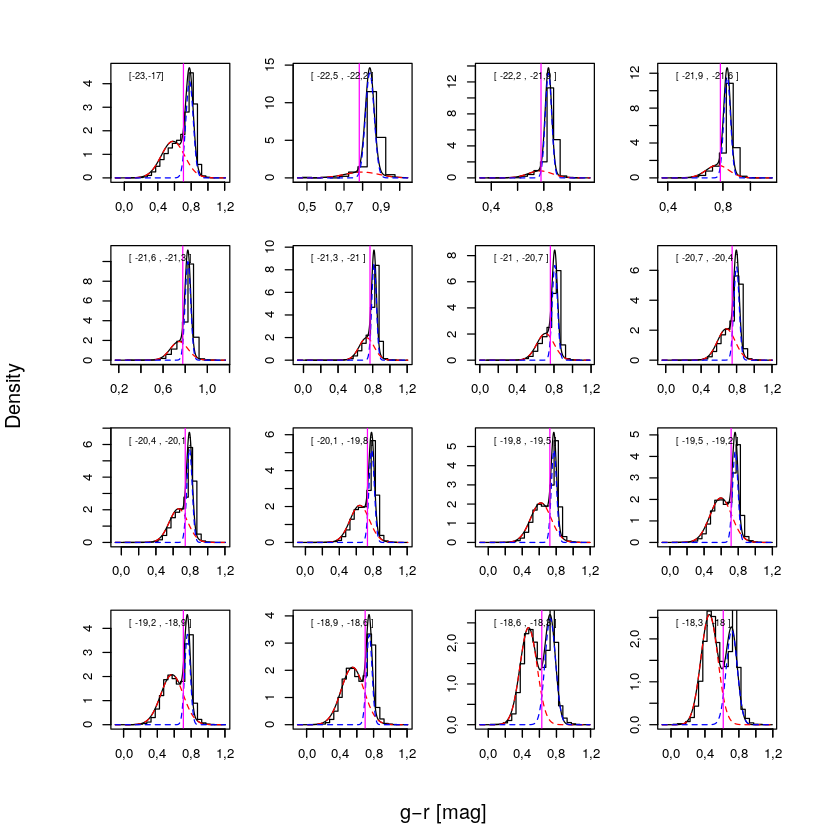

In [59]:
par(mfrow=c(4,4))
par(mar = c(2, 2, 2, 2))
par(oma = c(5, 5, 2, 2))
#xx=color1
#gaus=gmm1

a1=plot_col(color,gmm,"[-23,-17]",-23,-17)

a2=plot_col(color1,gmm1,as.character(paste("[",bin[1],",",bin[2],"]")),bin[1],bin[2])
a3=plot_col(color2,gmm2,as.character(paste("[",bin[2],",",bin[3],"]")),bin[2],bin[3])
a4=plot_col(color3,gmm3,as.character(paste("[",bin[3],",",bin[4],"]")),bin[3],bin[4])
a5=plot_col(color4,gmm4,as.character(paste("[",bin[4],",",bin[5],"]")),bin[4],bin[5])
a6=plot_col(color5,gmm5,as.character(paste("[",bin[5],",",bin[6],"]")),bin[5],bin[6])
a7=plot_col(color6,gmm6,as.character(paste("[",bin[6],",",bin[7],"]")),bin[6],bin[7])
a8=plot_col(color7,gmm7,as.character(paste("[",bin[7],",",bin[8],"]")),bin[7],bin[8])
a9=plot_col(color8,gmm8,as.character(paste("[",bin[8],",",bin[9],"]")),bin[8],bin[9])
a10=plot_col(color9,gmm9,as.character(paste("[",bin[9],",",bin[10],"]")),bin[9],bin[10])
a11=plot_col(color10,gmm10,as.character(paste("[",bin[10],",",bin[11],"]")),bin[10],bin[11])
a12=plot_col(color11,gmm11,as.character(paste("[",bin[11],",",bin[12],"]")),bin[11],bin[12])
a13=plot_col(color12,gmm12,as.character(paste("[",bin[12],",",bin[13],"]")),bin[12],bin[13])
a14=plot_col(color13,gmm13,as.character(paste("[",bin[13],",",bin[14],"]")),bin[13],bin[14])
a15=plot_col(color14,gmm14,as.character(paste("[",bin[14],",",bin[15],"]")),bin[14],bin[15])
a16=plot_col(color15,gmm15,as.character(paste("[",bin[15],",",bin[16],"]")),bin[15],bin[16])

mtext(expression(paste(g,'\u2212',r," ","[mag]")), side = 1, cex = 1, line = 3.2, col = "black", outer = TRUE)
mtext(expression(paste("Density")), side = 2, cex = 1, line = 3.2, col = "black", outer = TRUE)


In [15]:
#dev.off()

In [16]:
m=rbind(a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16)
m
m[1,3]

bin1,bin2,intersect
"-23,0","-17,0","0,7072"
"-22,5","-22,2","0,7822"
"-22,2","-21,9","0,7789"
"-21,9","-21,6","0,7820"
"-21,6","-21,3","0,7779"
"-21,3","-21,0","0,7697"
"-21,0","-20,7","0,7610"
"-20,7","-20,4","0,7500"
"-20,4","-20,1","0,7401"
"-20,1","-19,8","0,7313"


[1] 0,7072

# Color - Magnitud

In [17]:
library(dplyr)


Attaching package: ‘dplyr’


The following object is masked from ‘package:MASS’:

    select


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [18]:
M_r1<-g$V7
M_g1<-g$V8

In [19]:
M_r<-subset(M_r1,M_r1 >=-23. & M_r1 <= -17.)
M_g<-subset(M_g1,M_r1 >=-23. & M_r1 <= -17.)
length(M_r)

[1] 539036

In [20]:
col1= M_g-M_r

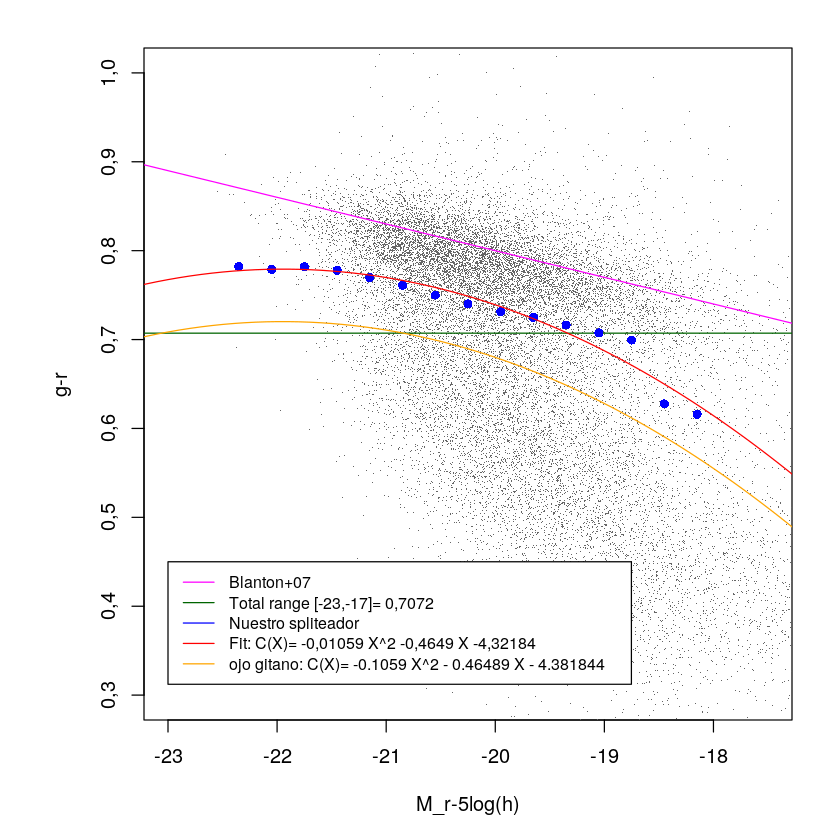

In [58]:
#cairo_ps("passive_cut.eps")
par(mfrow=c(1,1))
par(mar=c(5,5,1,1))  #c(b,l,t,r)
par(oma=c(0,1,1,1))  #c(b,l,t,r)

df=data.frame(M_r,col1)
new_df=sample_frac(df,0.05)
M_g_n <- new_df[,1]
color1_n <- new_df[,2]

#labx=TeX(' $\\M_r-5 \\, \\log{(h)}}\\]$')
labx="M_r-5log(h)"
plot(NA,xlim=c(-23,-17.5),ylim=c(0.3,1.0),xlab=labx,ylab='g-r',main='')
points(M_g_n,color1_n,pch=16,cex=0.1,col='grey40')

#---------------------
##--Display as a contour map:
#---------------------
require(KernSmooth)
l<-data.frame(M_r,col1)
colnames(l)[c(1,2)] <-c("Mag", "col")
est <- bkde2D(l[c("Mag", "col")], bandwidth=c(0.05, 0.05), gridsize=c(100, 100))
#with(est, contour(x1, x2, fhat, drawlabels=TRUE, add=TRUE, col="black",labcex=1))


#Ajuste Lineal Blanton+07
x=seq(-24,-16,0.1)
y=0.8-0.03*(x +20)
points(x ,y,type='l',col='magenta')


#Total range
abline(h=m[1,3],lw=1, lty=1,col='darkgreen')

xx=(m[1]-m[2])/2.+ m[2]
yy=m[3]
points(xx[-1,],yy[-1,],col="blue",pch=16)

#Ajuste cuadratico
#p=poly(xx,yy, degree = 2)
#modelo_p <- lm(p)
xseq=seq(-24,-17,0.1)
model <- lm(yy[-1,] ~ poly(xx[-1,],2))
coef1 <- lm(yy[-1,] ~ xx[-1,] + I(xx[-1,]^2))$coef
lines(xseq,  coef1[3]*xseq^2+ coef1[2]*xseq+ coef1[1], col='red')
lines(xseq,  -0.01059*xseq^2 - 0.46489*xseq - 4.381844, col='orange')

legend(-23.0, 0.45,
       legend=c("Blanton+07",
                paste("Total range [-23,-17]=",m[1,3]),
                "Nuestro spliteador",
                paste("Fit: C(X)=",round(coef1[3],5),"X^2",round(coef1[2],5),"X",round(coef1[1],5)),
                "ojo gitano: C(X)= -0.1059 X^2 - 0.46489 X - 4.381844"),
       col=c("magenta","darkgreen", "blue","red","orange"), lty=1, cex=0.8)

#dev.off()

In [23]:
round(coef1[3],5)
round(coef1[2],5)
round(coef1[1],5)

I(xx[-1, ]^2) 
     -0,01059

xx[-1, ] 
 -0,4649

(Intercept) 
   -4,32184

# GMM 2D (2 Gaussians) 
### Espacio color-magnitud

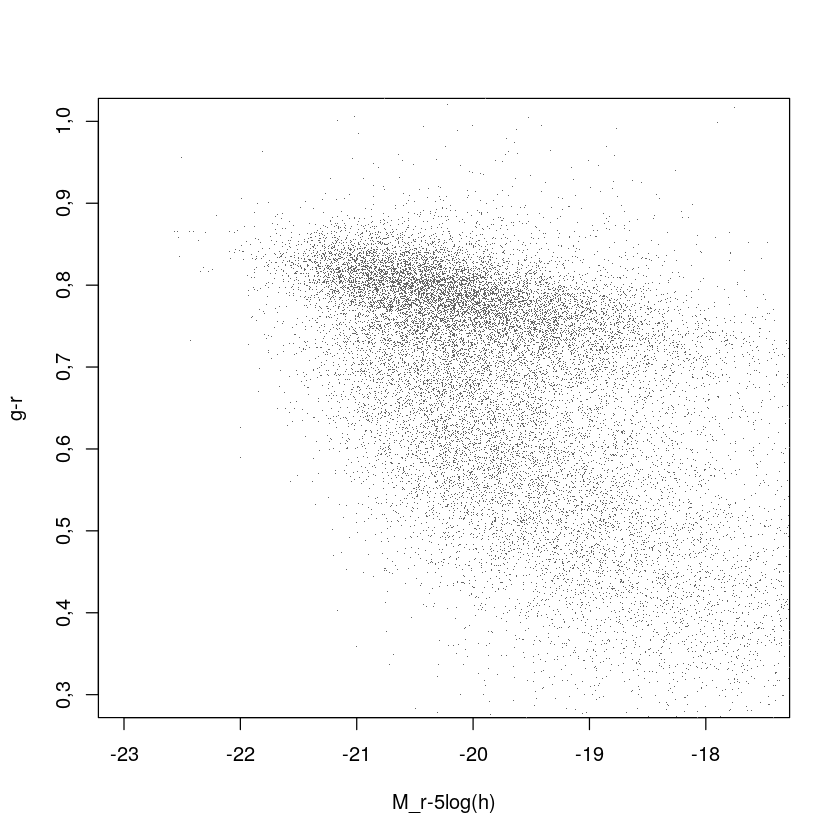

In [24]:
#df=data.frame(M_r,col1) #todo

color <- subset(col1, col1 > 0. & col1 < 1.1)
rr <- subset(M_r, col1 > 0. & col1 < 1.1)
df=data.frame(rr,color)

new_df=sample_frac(df,0.05)
M_g_n <- new_df[,1]
color1_n <- new_df[,2]

#labx=TeX(' $\\M_r-5 \\, \\log{(h)}}\\]$')
labx="M_r-5log(h)"
plot(NA,xlim=c(-23,-17.5),ylim=c(0.3,1.0),xlab=labx,ylab='g-r',main='')
points(M_g_n,color1_n,pch=16,cex=0.1,col='grey40')

In [25]:
gmm_2d <- densityMclust(df,G=2,initialization = set.seed(0), modelNames="VVV")

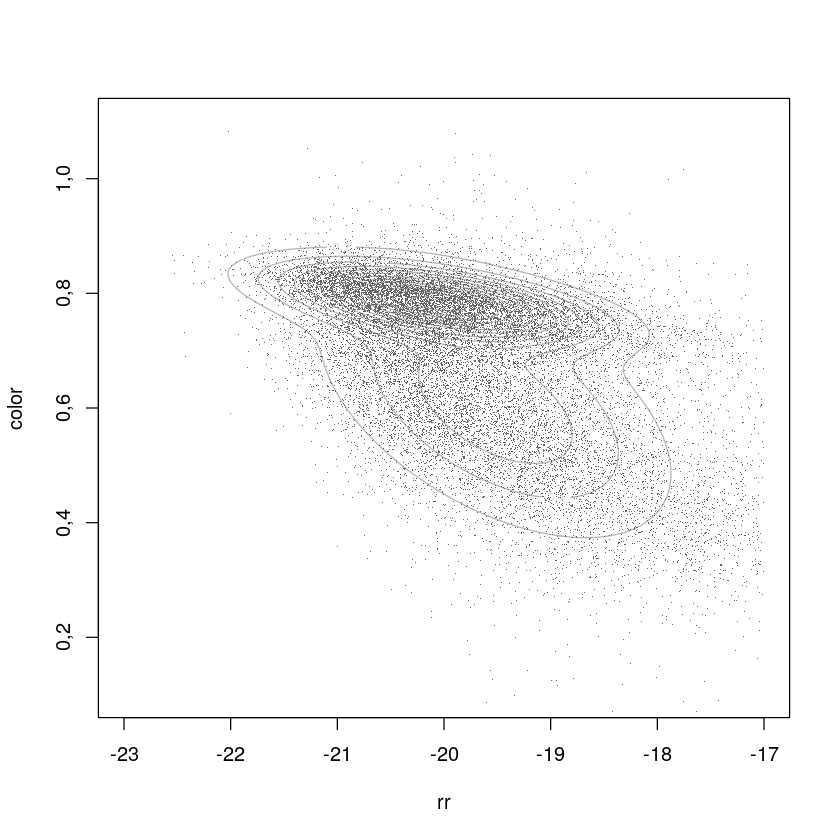

In [26]:
#plot(gmm, what = "density", data = new_df, pch = '.', points.cex = 0.005,xlim=c(-23,-17.5),ylim=c(0.1,1.1))
plot(gmm_2d , what = "density",xlim=c(-23,-17),ylim=c(0.1,1.1))#, type = "hdr")
points(M_g_n,color1_n,pch=16,cex=0.01,col='grey40')

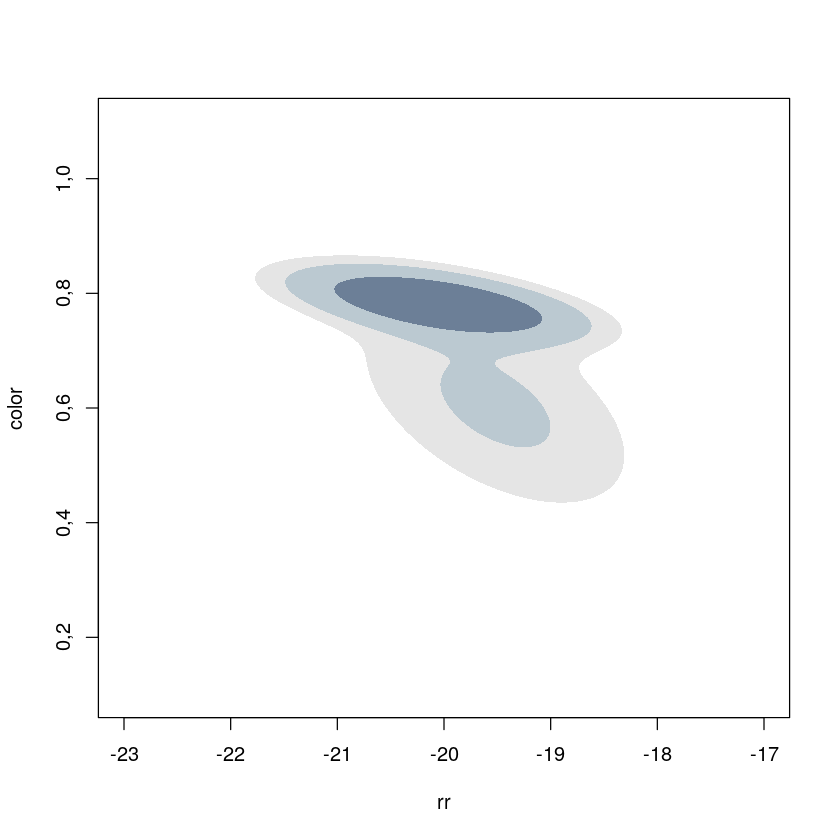

In [27]:
plot(gmm_2d , what = "density",xlim=c(-23,-17),ylim=c(0.1,1.1), type = "hdr")

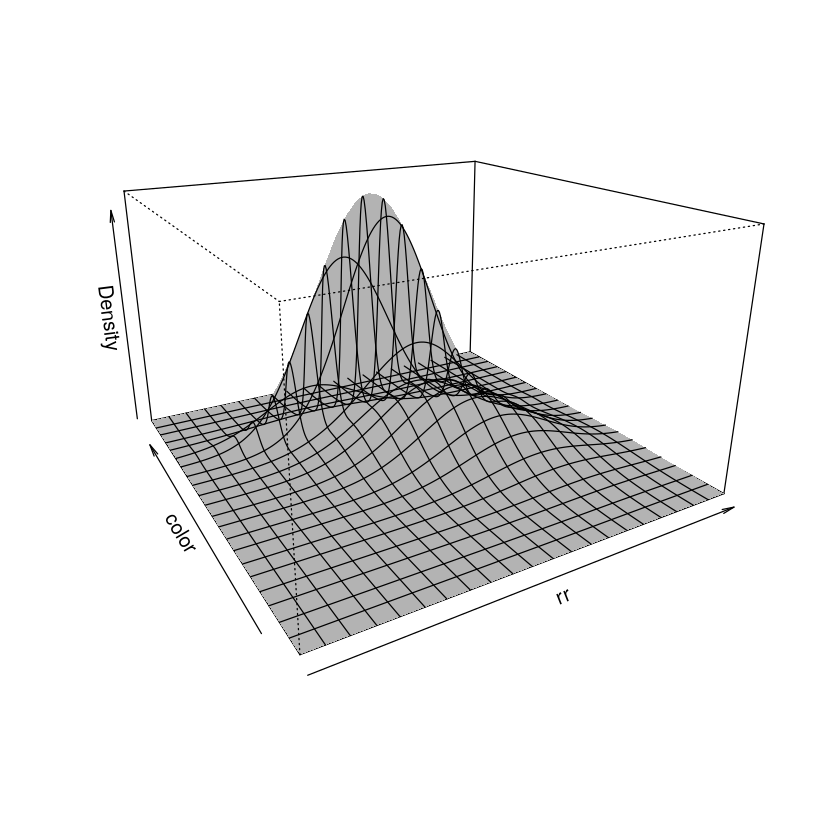

In [28]:
plot(gmm_2d , what = "density", type = "persp",xlim=c(-23,-17),ylim=c(0.1,1.1))

In [29]:
summary(gmm_2d)

------------------------------------------------------- 
Density estimation via Gaussian finite mixture modeling 
------------------------------------------------------- 

Mclust VVV (ellipsoidal, varying volume, shape, and orientation) model with 2
components: 

 log-likelihood      n df       BIC       ICL
      -271938,2 538587 11 -544021,7 -691473,9

In [30]:
#gmm_2d$classification
length(gmm_2d$classification)

[1] 538587

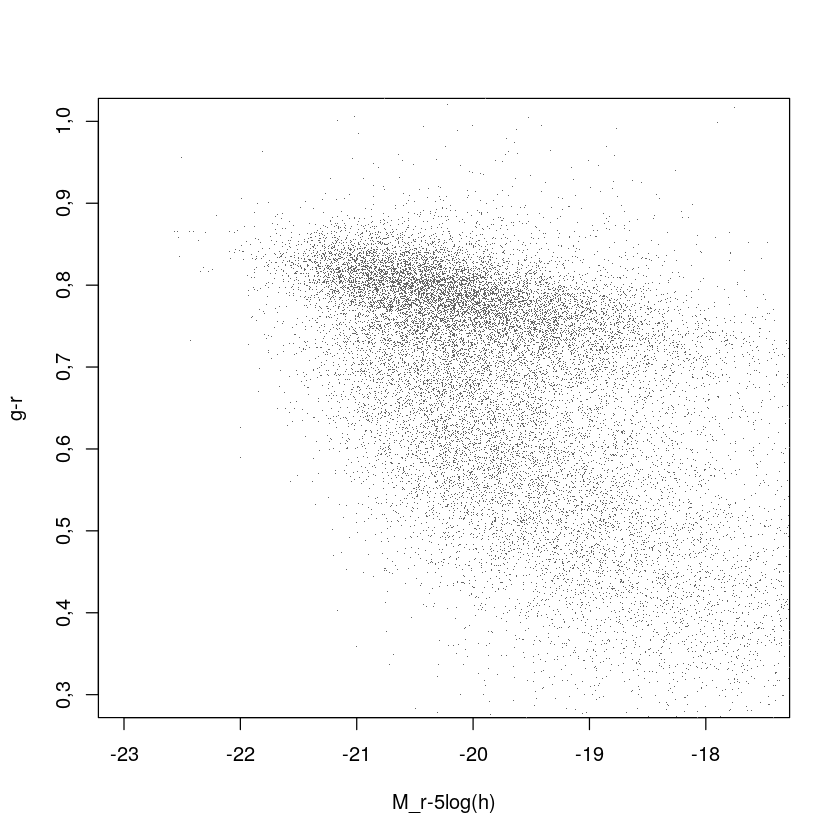

In [31]:
plot(NA,xlim=c(-23,-17.5),ylim=c(0.3,1.0),xlab=labx,ylab='g-r',main='')

points(M_g_n,color1_n,pch=16,cex=0.1,col='grey40')

In [32]:
gmm_2d$parameters

rr,"-20,0641138","-19,5173944"
color,"0,7835335","0,6034792"


In [33]:
#Matrix whose [i,k]th entry is the probability that observation i in the test data belongs to the kth class.
#gmm_2d$z


In [34]:
#The number of estimated parameters.
#gmm_2d$df

In [35]:
mod5 <- Mclust(df,G=2)

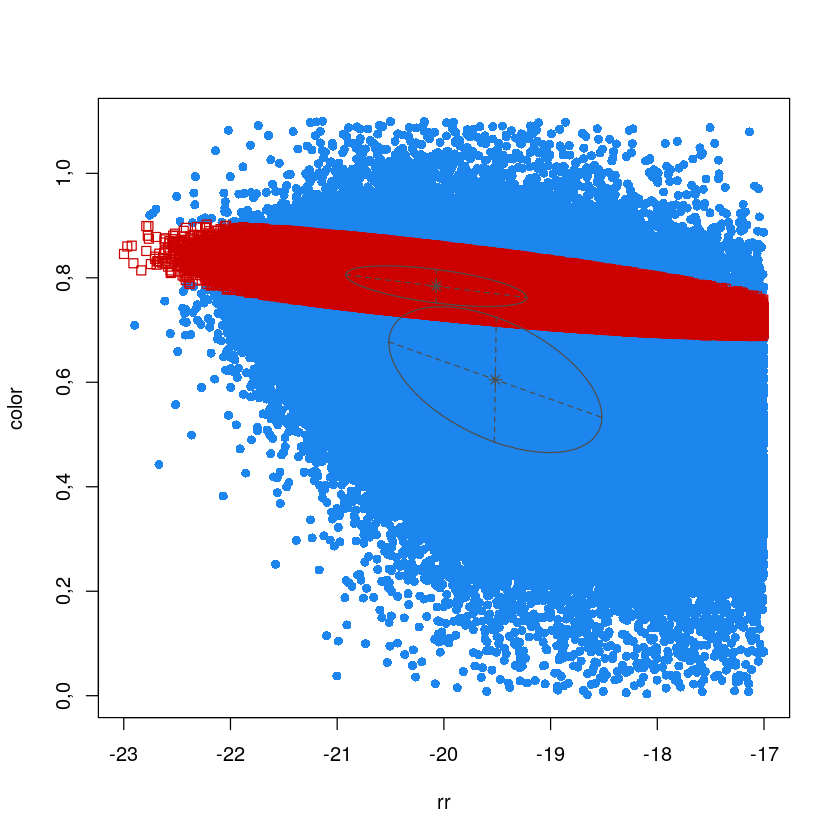

In [36]:
mclust2Dplot(data = df, what = "classification", 
             #identify = TRUE,
             parameters = mod5$parameters, z = mod5$z)

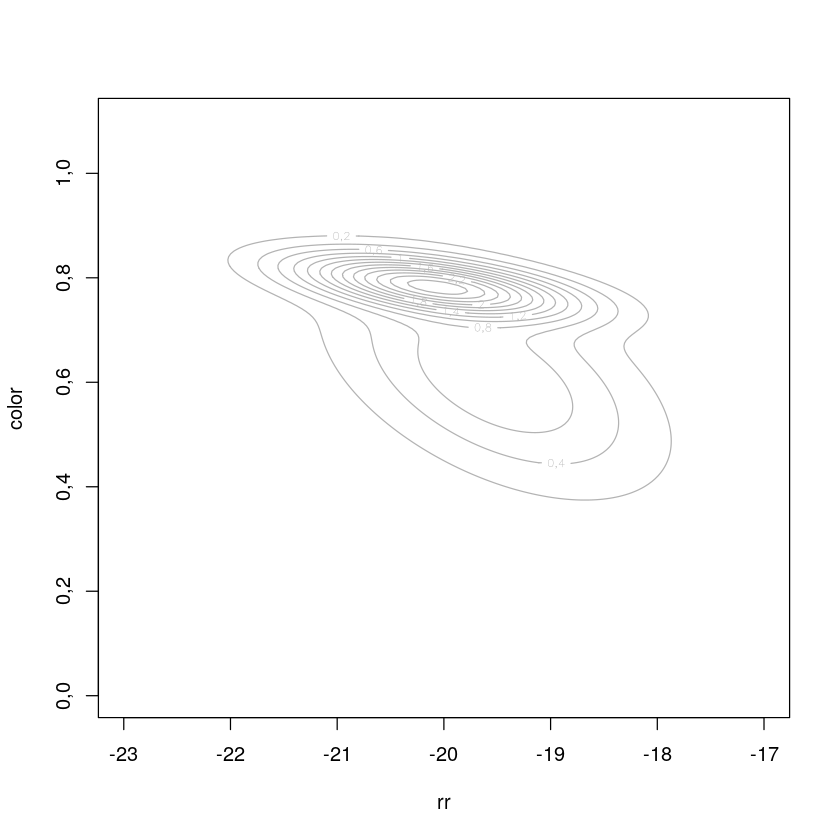

In [37]:
surfacePlot(data = df, what = "density", type = "contour",
            parameters = mod5$parameters)

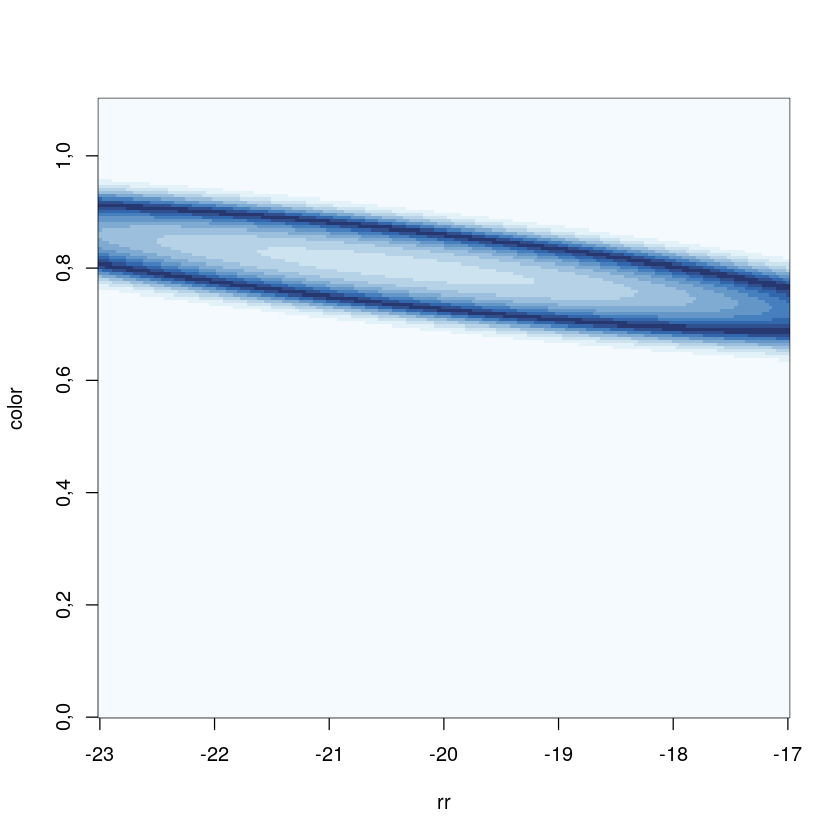

In [38]:
surfacePlot(data = df, , what = "uncertainty", type = "image",
            parameters = mod5$parameters)#,  transformation = "log")